In [1]:
import os
import numpy as np
import librosa
import scipy as sp
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import soundfile as sf
import string
from scipy import signal
import sympy as sp

In [2]:
n=np.linspace(1,400,400) #skip to miden giati ginetai diairesi me 0 stin phi
M=21
t=M/2 #delay erwtimatos 2.3.B

a=1+0.6*np.cos(np.pi*n/100)
phi=np.cos((np.pi*n/5)+4*np.sin(3*np.pi/n*200))
x=a*np.cos(phi)
hd=(1-np.cos(np.pi*(n-t)))/(np.pi*(n-t)) #filtro erwtimatos 2.3.B
y=np.convolve(x,hd,mode='same') #eksodos filtrou

a_mom=(x**2+y**2)**(0.5) #mom==momentary=="^"
phi_mom=np.arctan(y/x)
wi_arith=(-np.sin((np.pi*n/5)+4*np.sin(3*np.pi*n/200))) * (10*n**2-3*np.pi*np.cos((3*np.pi*n)/(200)))
wi_paron=50*(n**2) 
wi=wi_arith/wi_paron #paragwgos tis φ[n] (manually ypologismos typou)
phi_plus_1=[] #φ^[n+1] 
phi_minus_1=[] #φ^[n-1]

for i in range(0,400): 
    if(i==399):
        phi_plus_1.append(0)
        break
    else:
        phi_plus_1.append(phi_mom[i])
        
for i in range(0,400):
    if(i==0):
        phi_minus_1.append(0)
    else:
        phi_minus_1.append(phi_mom[i-1])        
        
wi_mom=[]        
for i in range(0,400):
    wi_mom.append((phi_plus_1[i]-phi_minus_1[i])/2)
#print(phi_plus_1)




In [3]:
print("Το y[n] είναι: ", y)
print("Το a^[n] είναι: ",a_mom)
print("Το wi^[n] είναι: ",wi_mom)

Το y[n] είναι:  [0.77667842 1.08395118 0.6376014  0.39333096 0.91437503 1.0911558
 0.58673388 0.47760067 1.04627991 1.07252845 0.55096368 0.58057676
 1.14625937 1.04989369 0.54519812 0.6735961  1.20969827 1.0486052
 0.56886494 0.73036824 1.24281921 1.08474218 0.61879643 0.73873315
 1.24451126 1.16036554 0.70258765 0.70650799 1.19626526 1.2581718
 0.83839176 0.67170496 1.07238415 1.32921352 1.03338507 0.70600696
 0.88584085 1.28871198 1.24324887 0.87423087 0.74846152 1.07874478
 1.33787831 1.14509836 0.82098498 0.8266434  1.17048608 1.32859681
 1.10170516 0.82489161 0.86717871 1.18235663 1.31478999 1.11049045
 0.85379819 0.86358535 1.13688072 1.29739256 1.15270826 0.90469098
 0.84154263 1.04651164 1.25218819 1.20163268 0.98126862 0.83894741
 0.93574703 1.15505714 1.21926396 1.07027246 0.88309119 0.85172755
 1.01241115 1.16711278 1.13382982 0.96620033 0.83751336 0.87725782
 1.03894059 1.12522164 1.044098   0.8908523  0.81315824 0.88770717
 1.025933   1.0616864  0.96241552 0.83222478 0.79

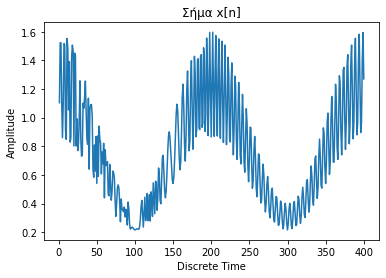

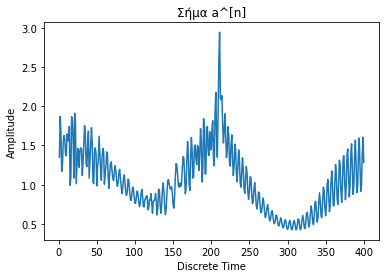

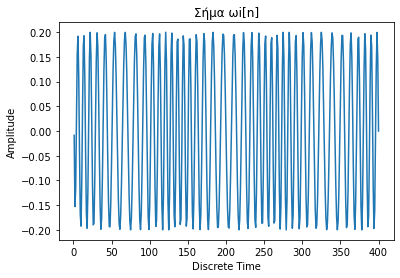

In [4]:
#plots

plt.plot(n,x)
plt.ylabel("Amplitude")
plt.xlabel("Discrete Time")
plt.title("Σήμα x[n]")
plt.show()

plt.plot(n,a_mom)
plt.ylabel("Amplitude")
plt.xlabel("Discrete Time")
plt.title("Σήμα a^[n]")
plt.show()

plt.plot(n,wi)
plt.ylabel("Amplitude")
plt.xlabel("Discrete Time")
plt.title("Σήμα ωi[n]")
plt.show()

In [9]:
#rms values
def root_mean(in_array):
    in_array=np.asanyarray(in_array)
    ms = 0
    for i in range(0,len(in_array)):
        ms += (in_array[i])**2
    ms = ms / len(in_array)
    rms = np.sqrt(ms)
    return(rms)



a_error=a-a_mom
wi_error=wi-wi_mom
print("RMS(%) του λάθους a[n]−aˆ[n] είναι:", (root_mean(a_error)/root_mean(a))*100,"%")
print("RMS(%) του λάθους ωi[n]−ωi^[n] είναι:", (root_mean(wi_error)/root_mean(wi))*100,"%")


RMS(%) του λάθους a[n]−aˆ[n] είναι: 28.145094838654046 %
RMS(%) του λάθους ωi[n]−ωi^[n] είναι: 113.7562144225307 %
0.14100072726657417 0.07418441062306422
